# Q1_Answer: 
I employ the QGIS Tool for map visualization purposes.

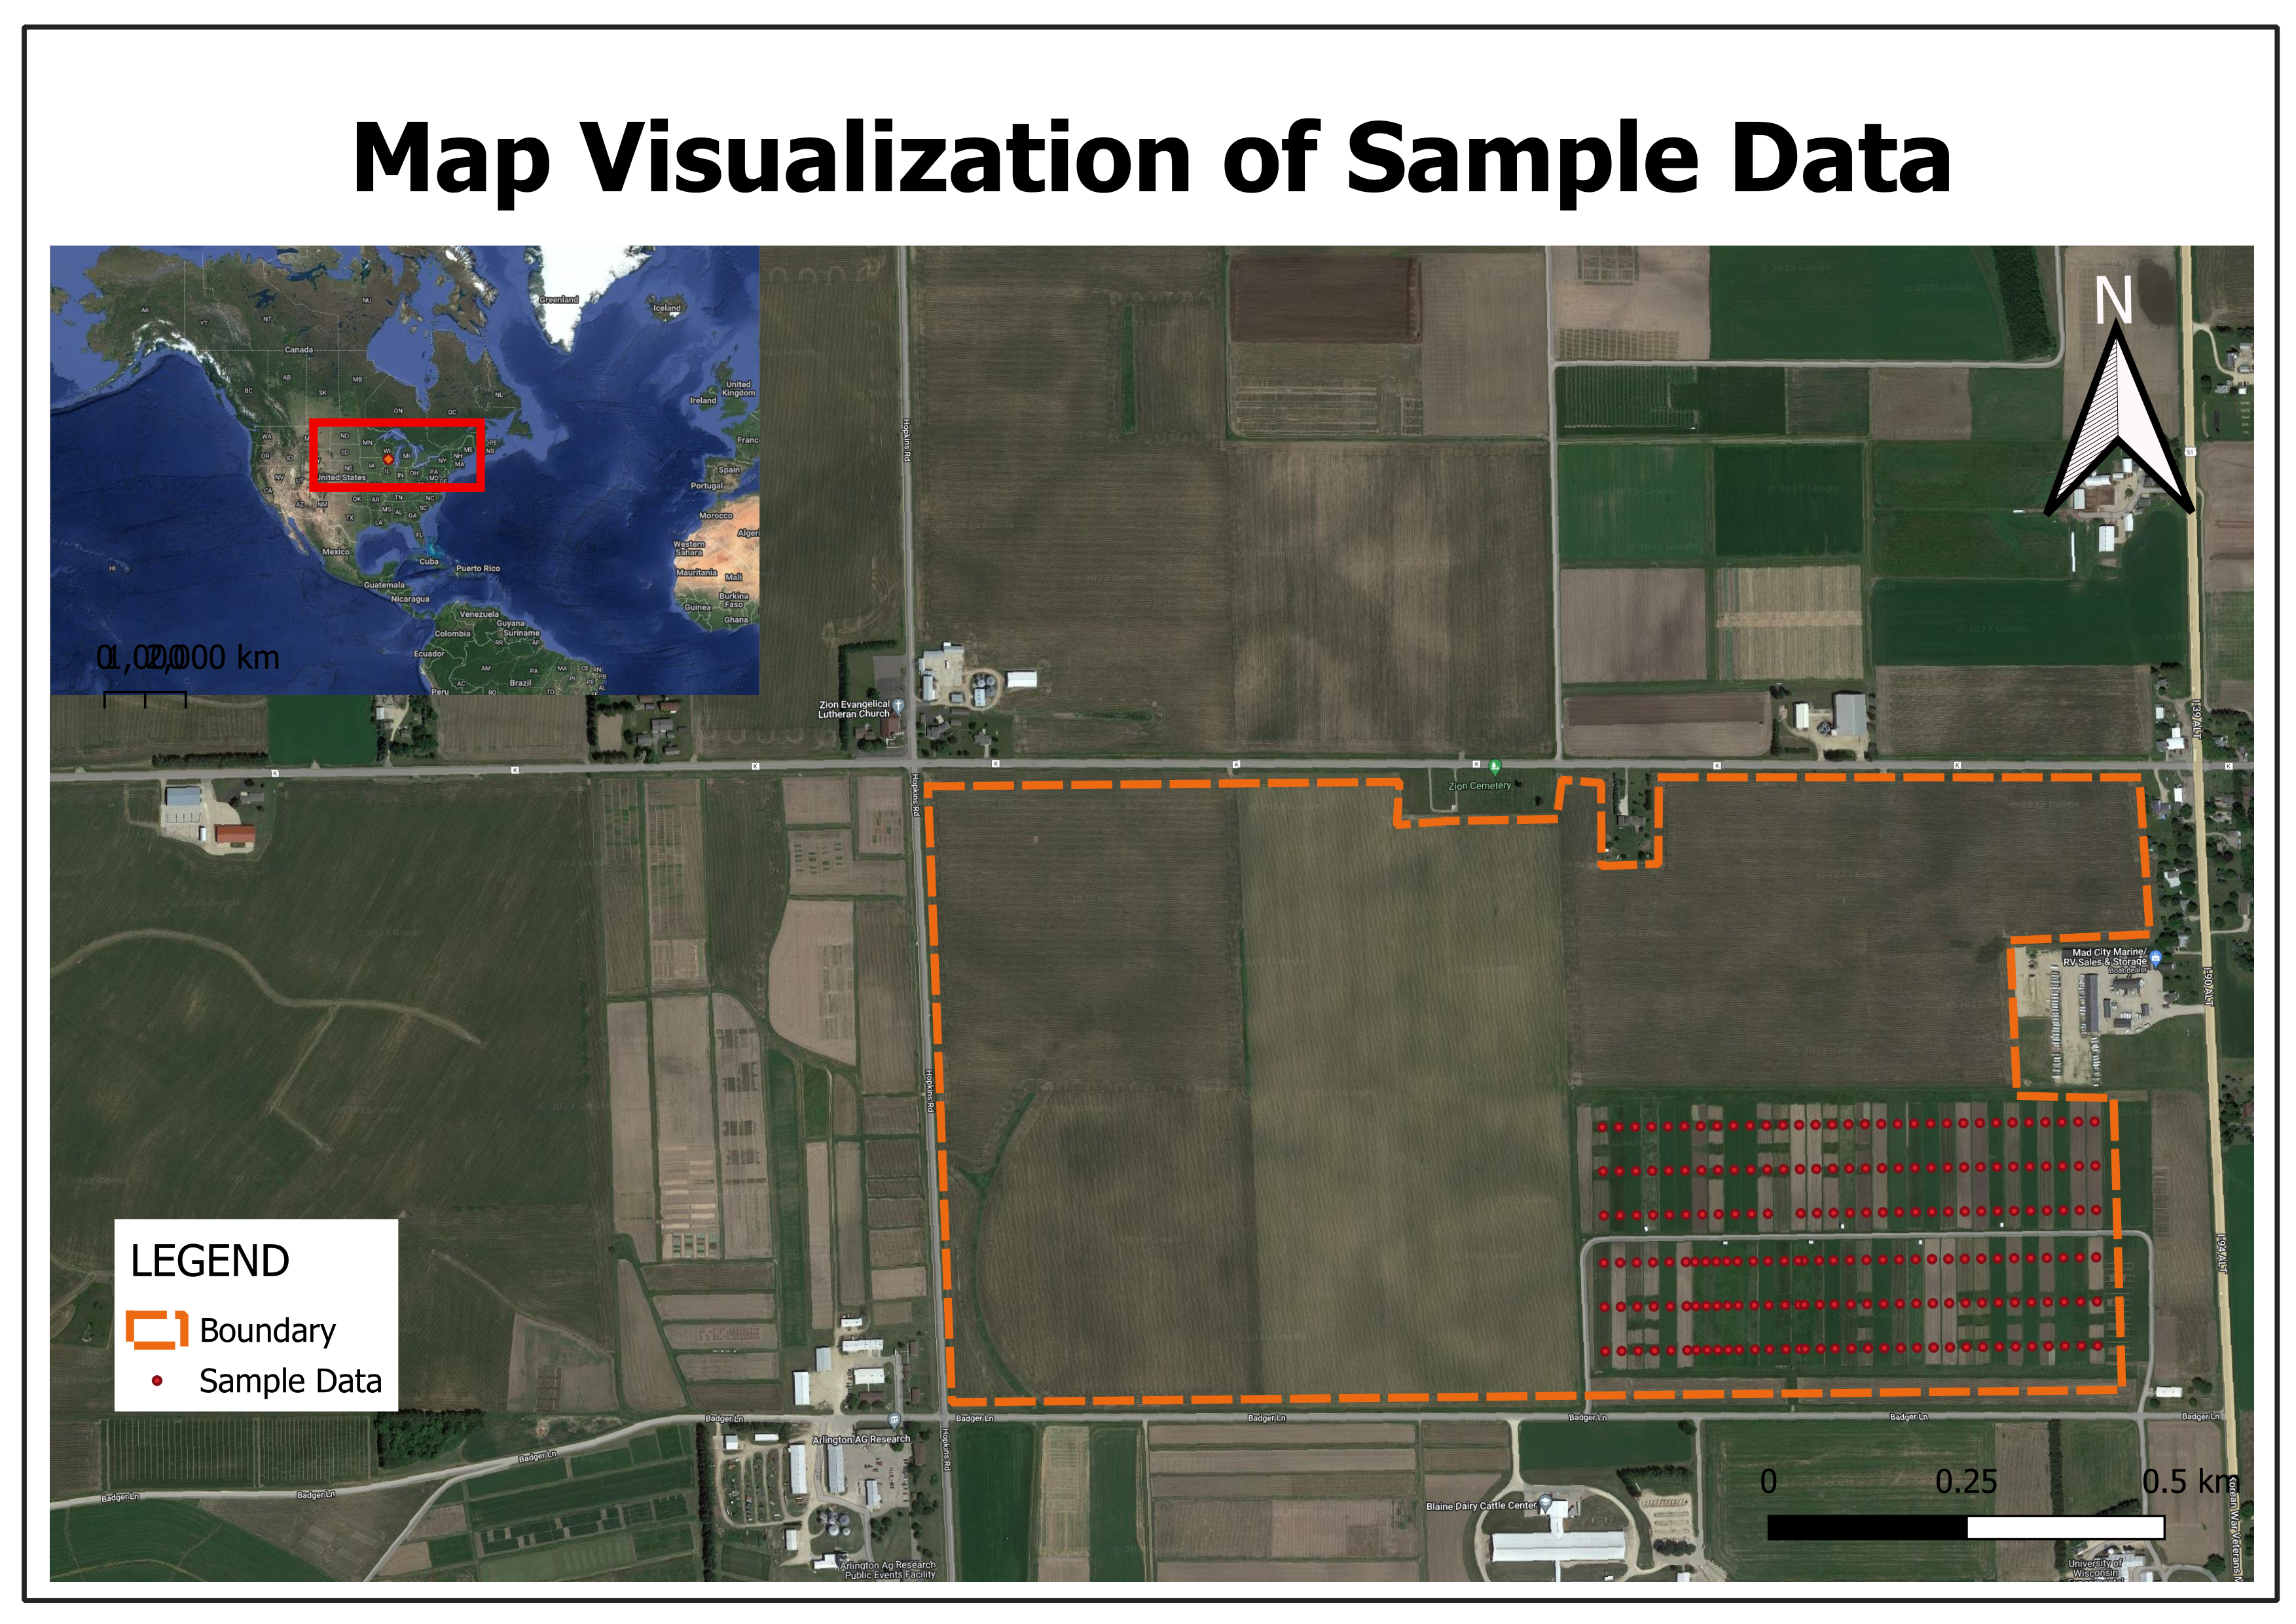

In [1]:
from IPython.display import display, Image

display(Image(filename='Map.png'))


# Q2_Answer: 
For the purpose of statistical analysis, I pulled the soil organic carbon data from the given pre-sample dataset. I used QGIS to extract this information and create a CSV file. The ensuing step involves loading this CSV file into a dataframe for statistical examination. Essential packages such as pandas and matplotlib were imported for this purpose. Pandas was used for constructing the dataframe, while matplotlib was utilized for creating the graphical representation.

## Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Load CSV into Dataframe and analysis

In [4]:
SOC = pd.read_csv('SOC.csv')
SOC.describe()

soc_stock_t_ha
count      194.000000
mean        43.515979
std          9.565845
min          9.100000
25%         37.500000
50%         42.150000
75%         48.575000
max         72.200000

## Median

In [5]:
SOC.median()

soc_stock_t_ha    42.15
dtype: float64

## Histogram

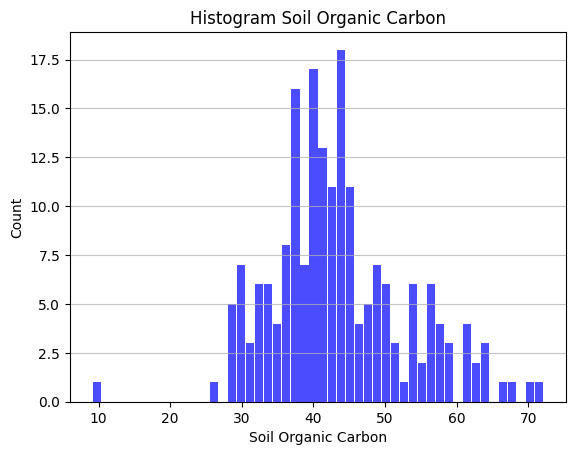

In [6]:
SOC.hist(bins=50, grid=False, color='blue', rwidth=0.9, alpha=0.7)

plt.title('Histogram Soil Organic Carbon')
plt.xlabel('Soil Organic Carbon')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Q3_Answer:
The provided data sets are as follows:
1. SRTM Digital Elevation Data Version 4 (unit in meter).
2. Landsat 7 Collection 1 Tier 1 Annual NDVI Composite (pixel size 30m).
3. MOD17A3HGF.061: Terra Net Primary Production Gap-Filled Yearly Global 500m (Npp - kg*C/m^2).
4. OpenLandMap Clay Content (b0,b10,b30,b60,b100,b200 are according to depth in cm.Units -%(kg/kg)).
5. OpenLandMap Soil pH in H2O(b0,b10,b30,b60,b100,b200 are according to depth in cm).

# Q4_Answer:
I utilized QGIS to pull the values from the covariate datasets at the locations of the sample points. The covariate datasets will be inputted into dataframes in line with their respective names.

There are distinct bands visible for the three covariates. In the case of NPP, only the Npp is extracted, excluding the qc. For soil clay, I calculated the average value for the depth range of 0 to 200 cm. I repeated the same process for soil pH. As these figures correspond to depth, utilizing the mean data is suitable for establishing the correlation.

In [8]:
DEM = pd.read_csv('SRTM.csv')
NPP = pd.read_csv('NPP.csv')
NDVI = pd.read_csv('NDVI.csv')
Soil_PH = pd.read_csv('Soil_PH.csv')
Soil_clay = pd.read_csv('Soil_Clay.csv')

Now I will calculate the correlation with SOC data.

## With DEM

In [9]:
correlation_DEM=SOC['soc_stock_t_ha'].corr(DEM['Value'])
correlation_DEM

-0.05491394405361804

## With NDVI


In [10]:
correlation_NDVI=SOC['soc_stock_t_ha'].corr(NDVI['SAMPLE_1'])
correlation_NDVI

0.1560342361121707

## With NPP

In [11]:
correlation_NPP=SOC['soc_stock_t_ha'].corr(NPP['SAMPLE_1'])
correlation_NPP

-0.016807040730125036

## With Soil PH

In [12]:
correlation_Soil_ph=SOC['soc_stock_t_ha'].corr(Soil_PH['value'])
correlation_Soil_ph

-0.11214666237764863

## WIth Soil Clay

In [13]:
correlation_Soil_clay=SOC['soc_stock_t_ha'].corr(Soil_clay['value'])
correlation_Soil_clay

-0.06120163361779935

So after determining the correlation, we can see all the covariates are negatively correlated except for NDVI.

# Q5_Answer:
The correlation between the covariate datasets is extremely weak; none surpassed the 0.5 threshold. As stated in section 8.2.1.2, to define the strata, the most reliable data on elements anticipated to influence the SOC stock's response to project activities must be utilized. Therefore, given the correlation_NDVI equals 0.15603423611217068 and correlation_Soil_ph is -0.11214666237764877, indicating a negative correlation, we will use the NDVI data for strata determination.
Because the covarites show low correlation with SOC we can look for more covarites and determine the correletaion to get some insights.



## Q6_Answer:
The steps are given below:
## 1. Identify the covariates: 
Identify the factors that affect the response of SOC. It includes climate,topography,historical land use,vegetation,etc.
## 2. Define Strata:
Divide the project area into homogeneous strata.
## 3. Define Sample Size:
The larger a stratum’s area and the greater the expected or known variability within a stratum, the higher the number of samples that must be taken within the stratum. At least 3-5 composite samples should be taken within each stratum.
## 4.Random Sampling:
For making the sampling approach unbiased and capture variability select sampling points randomly within each stratum
## 5.Collect Samples:
Collect the soil samples for each identified sampling points.
## 6. Statistical Analysis:
Calculate the SOC stocks and perform statistical correleation with the identified covariates. Also check the variability of SOC by standard daviation within and between the strata. 
## 7. Report:
Document all the steps and provide justification for stratification and sample design